# Data 전처리(Data Preprocessing)란
- Raw Data을 학습하기 전에 변경하는 작업
    - Garbage in, Garbage out.
        - 좋은 train dataset으로 학습 해야 좋은 예측 결과를 만드는 모델을 학습할 수 있다.
        - 좋은 train dataset을 만드는 것은 모델의 성능에 가장 큰 영향을 준다.<br><br>
- 목적에 따른 전처리 분류
    1. **학습이 가능한 데이터셋**을 만들기 위한 전처리
        - 머신러닝 알고리즘은 **숫자만 처리**할 수 있다. (수식이므로) 그래서 결측치, 문자열이 있으면 학습이나 추론을 할 수 없다.
    2. **학습이 더 잘되도록** 만들기 위한 전처리
        - **공학적 전처리 (Feature Engineering)** : 규칙적으로 정해져 있는 전처리
        - **도메인 지식**에 의한 전처리 : 업무와 관련되어 지식과 관련된 전처리

# 결측치 처리
- 결측치 (Not Available-NA, NaN, None, Null)
    - 수집하지 못한 값. 모르는 값.
- 머신러닝 알고리즘은 데이터셋에 결측치가 있으면 학습이나 추론을 하지 못하기 때문에 적절한 처리가 필요하다.
    - 결측치 처리는 데이터 전처리 단계에서 진행한다.

- 결측치 처리방법
    1. **제거** (열단위, 행단위) 
        - 행단위를 기본으로 하는데 특정 열에 결측치가 너무 많을 경우 열을 제거할 수 있다.
            - **행 자체를 삭제**하는 것을 기본으로 하는데, **열 자체를 제거**하는 경우도 있다. (한 열에 결측치가 많을 때)<br><br>
    1. **다른 값으로 대체**
        - 가장 가능성이 높은 값으로 대체
            - 수치형: 평균, 중앙값, 
            - 범주형: 최빈값(출연 빈도가 가장 많은 값)
            - 그 Feature의 결측치를 예측하는 머신러닝 알고리즘을 모델링해서 추론
        - 결측치 자체를 표현하는 값을 만들어서 대체 
            - 나이에 -1, 혈액형에 ? 같와 같이 그 Feature가 가질 수 없는 값으로 결측치를 표현하는 값을 정한 뒤 대체한다.

## 결측치 제거
- Pandas 
    - `dataframe.isnull()`, `dataframe.isna()`
        - 원소별 결측치 인지 여부 확인
    - `dataFrame.dropna(axis=0, subset=None, inplace=False)`
        - 결측치 제거
        - axis=0(default): 결측치가 있는 **행을 삭제**, axis=1: 결측치가 있는 **열을 삭제**
        - subset: 결측치가 있으면 제거할 열이나 행을 지정한다.
        - inplace=False(default): 결측치를 제거한 결과 DataFrame을 생성해서 반환. inplace=True: 원본 dataframe에 적용한다.
## 결측치 다른 값으로 대체
- Pandas
    - `dataframe.fillna(value)`
        - value: 결측치를 채울 값을 지정한다.
            - scalar: 지정한 값으로 모두 채운다.
            - dictionary: key-컬럼명, value-채울값
                - 컬럼별로 다른 값으로 채운다.
                
- scikit-learn
    - `sklearn.impute.SimpleImputer` transformer 클래스 사용
        - 주요 매개변수
            - **strategy="mean"**
                - **결측치를 어떤 값으로 변경할지를 설정.**
                - "mean": default로 평균값으로 변경한다.
                - "median": 중앙값으로 변경한다.
                    - "mean", "median"은 **연속형 feature**에 적용한다.<br><br>
                - "most_frequent": 최빈값으로 변경한다. **범주형 feature**에 적용한다.
                - "constant": 매개변수 fill_value에 설정한 값으로 변경한다.

In [2]:
import pandas as pd
import numpy as np

# 결측치 처리 실행 예시 데이터
data = {
    "col1":[10, np.nan, 30, 40], # 결측치는 float 타입이므로, 다른 정수들도 float 타입으로 입력된다.
    "col2":['A', 'A', 'C', np.nan],
    "col3":[10.5, 2.8, np.nan, 9.7]
}
df = pd.DataFrame(data)
df

,col1,col2,col3
0,10.0,A,10.5
1,NaN,A,2.8
2,30.0,C,NaN
3,40.0,NaN,9.7


In [10]:
df.isna().sum()

col1    1
col2    1
col3    1
dtype: int64

In [13]:
df.isna().sum(axis=1)

0    0
1    1
2    1
3    1
dtype: int64

In [4]:
#### 제거
df.dropna() # ==> 결측치가 있는 행 제거

,col1,col2,col3
0,10.0,A,10.5


In [6]:
df.dropna(subset=['col1', 'col3']) # col1 과 col3 에 결측치가 있는 행 삭제

,col1,col2,col3
0,10.0,A,10.5
3,40.0,NaN,9.7


In [8]:
df.dropna(axis=1) # 결측치가 존재하는 열 삭제, index만 살아남은 모습

""
0
1
2
3


In [14]:
df.dropna(axis=1, subset=[1, 2]) # axis=1; 컬럼을 지우는데, subset=[1,2] : 행 인덱스 1,2인 값들 중에서 확인

,col2
0,A
1,A
2,C
3,NaN


In [16]:
#### 변경
df.fillna(10)

# 해당 컬럼의 다른 값들의 데이터 타입에 맞춰서 더 큰 개념의 데이터 타입으로 통일 시킨다.

,col1,col2,col3
0,10.0,A,10.5
1,10.0,A,2.8
2,30.0,C,10.0
3,40.0,10,9.7


### 🚩 결측치, NaN은 float 타입!

In [17]:
df.fillna({
    "col1":1000,
    "col2":"가"
})

,col1,col2,col3
0,10.0,A,10.5
1,1000.0,A,2.8
2,30.0,C,NaN
3,40.0,가,9.7


In [18]:
df[['col1', 'col3']].median()

col1    30.0
col3     9.7
dtype: float64

In [20]:
df['col2'].mode() # 최빈값 -> A

0    A
Name: col2, dtype: object

In [3]:
#### scikit-learn을 이용해서 결측치를 다른 값으로 대체하는 방법 ####
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="median")
imputer_cate = SimpleImputer(strategy="most_frequent")

# 연속형
# imputer_con.fit(df[['col1', 'col3']]) # 어떻게 바꿀지 학습 - 컬럼별로 중앙값 계산하는 과정
# r1 = imputer_con.transform(df[['col1', 'col3']]) # 변경
r1 = imputer_con.fit_transform(df[['col1', 'col3']]) # 위의 두 fit, transform 과정을 나누지 않고 한 번에 해결가능.
r1

array([[10. , 10.5],
       [30. ,  2.8],
       [30. ,  9.7],
       [40. ,  9.7]])

In [4]:
# 범주형
# fit() : 학습, 최빈값 찾기 / transform() : 찾은 최빈값으로 결측치 대체
r2 = imputer_cate.fit_transform(df[['col2']])
r2

array([['A'],
       ['A'],
       ['C'],
       ['A']], dtype=object)

In [6]:
# 연속형, 범주형으로 나눠서 결측치를 대체한 후
# 결과를 다시 하나로 합치는 과정.
result = np.concatenate([r1, r2], axis=1)
result

array([[10.0, 10.5, 'A'],
       [30.0, 2.8, 'A'],
       [30.0, 9.7, 'C'],
       [40.0, 9.7, 'A']], dtype=object)

# 이상치(Outlier) 처리
- 의미 그대로 이상한 값, 튀는 값, 패턴을 벗어난 값으로 그 Feature를 가지는 대부분의 값들과는 동떨어진 값을 말한다.

- **오류값**
    - 잘못 수집 된 값.
    - 처리    
        - 결측치로 변환 후 처리를 한다.

- **극단치(분포에서 벗어난 값)**
    - 정상적인 값이지만 다른 값들과 다른 패턴을 가지는 값.
    - 일반적으로 극단적으로 크거나 작은 값
    - 처리
        1. 그 값을 그대로 유지한다.
        1. 결측치로 변환 후 처리를 한다.
        1. 다른 값으로 대체한다.
            - 보통 그 값이 가질 수 있는 Min/Max값을 설정한 뒤 그 값으로 변경한다.
    

# Feature 타입 별 전처리

## 통계에서의 데이터 타입 
- 어떤 종류의 값을 모았는지에 따라 크게 범주형과 수치형으로 나눈다.
> 통계적으로 데이터형식을 나누는 기준은 여러가지가 있다.

- **범주형(Categorical) 변수**
    - 개별값들이 이산적(Discrete)이며 값이 가질수 있는 대상값이 몇가지 범주(Category)로 정해져 있는 데이터 타입.
    - **명목(Norminal) 변수/비서열(Unordered) 변수**
        - 범주에 속한 값 사이에 서열(순위)가 없는 변수로 단순 분류가 목적인 타입.
        - 성별, 혈액형
    - **순위(Ordinal) 변수/서열(Ordered) 변수**
        - 범주에 속한 값들 사이에 서열(순위)가 있는 변수.
        - 성적, 직급, 만족도

> 이산적(Discrete): 대상 값이 연속적이지 않고 떨어져 있는 형태

- **수치형(Numerical) 변수**
    - 숫자 데이터 타입이다. 보통 중복된 값이 없거나 적고 값으로 올수 있는 대상이 정해져 있지 않다. 이산형과 연속형 변수로 구성된다.
    - 이산형(Discrete)
        - 수치적 의미를 가지나 **실수(소숫점형태)로 표현되지 않는** 값들을 의미한다.
        - 물건의 재고량, 가격(원), 사고발생 건수 
    - 연속형(Continuous)
        - 수치적 의미를 가지고 실수(소숫점)로 표현이 가능한 측정 할 수 있는 값들을 의미한다.
        - 키, 몸무게, 시간
        
- 동일한 데이터도 어떻게 표현하느냐에 따라 다양한 타입으로 표현가능하다.
    - 예를들어 몸무게는 그 자체가 **연속형**이지만 50kg대, 60kg대,.. 이렇게 묶어서 표현하면 범주형이 된다.

> - **파이썬 데이터 타입별**
>   - **실수형** 데이터로 구성된 Feature는 연속형 값이다.
>   - **문자열** 데이터로 구성된 Feature는 단순 문자열값(ex..이름,ID)이거나 범주형 값이다.
>   - **정수형** 데이터로 구성된 Feature는 범주형이거나 일반 수치형(이산형) 값이다.
>      - 몇개의 고유값으로 구성되었는지를 봐야 한다.

범주형, 수치형인 데이터 타입에 따라 공학적인 전처리 방법이 있기 때문에
각각의 데이터 타입에 따른 방법 소개

# 범주형 데이터 전처리
- Scikit-learn의 머신러닝 API들은 Feature나 Label의 값들이 **숫자(정수/실수)인 것만** 처리할 수 있다.<br><br>
- 문자열(str)일 경우 **숫자 형으로 변환**해야 한다. 
    - **범주형 변수의 경우** 전처리를 통해 정수값으로 변환한다.
    - 범주형이 아닌 **단순 문자열인** 경우 일반적으로 제거한다. : `해당 값들이 모델 학습 결과에 의미가 없기 때문에 보통 삭제한다.`
    


## 범주형 Feature의 처리
- **Label Encoding**
- **One-Hot Encoding**

## 레이블 인코딩(Label encoding)


- 범주형 Feature의 고유값들 오름차순 정렬 후 0 부터 1씩 증가하는 값으로 변환
- **숫자의 크기의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.**
- **숫자의 크기의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.**

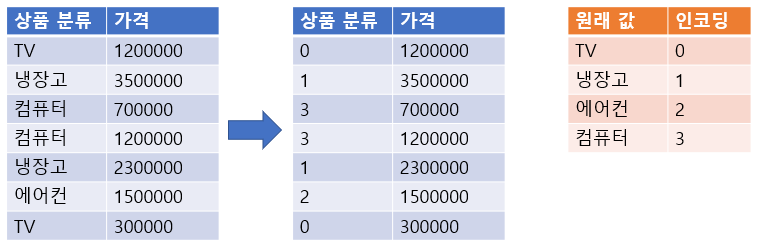

- **sklearn.preprocessing.LabelEncoder** 사용
    - fit(): 어떻게 변환할 지 학습
    - transform(): 문자열를 숫자로 변환
    - fit_transform(): 학습과 변환을 한번에 처리
    - inverse_transform():숫자를 문자열로 변환
    - classes_ : 인코딩한 클래스 조회

In [11]:
items = ['TV', '냉장고', '컴퓨터', '컴퓨터', '냉장고', '에어콘',  'TV', '에어콘']

In [14]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder생성
le = LabelEncoder()

# 학습 -> 어떻게 변환할지 찾는다. 고유값(class) 과 숫자를 연결한 표를 생성
le.fit(items)

# 변환 -> fit()에서 학습한 것을 바탕으로 각각의 원소를 변환
item_label = le.transform(items)
item_label

array([0, 1, 3, 3, 1, 2, 0, 2])

In [15]:
# 인코딩된 클래스를 확인
le.classes_ 

# 배열의 index가 class, 원소가 class name

array(['TV', '냉장고', '에어콘', '컴퓨터'], dtype='<U3')

In [19]:
# 디코딩 (class(인코딩된 정수)->class name(원래 문자열))
le.inverse_transform([3, 2, 2, 1, 0, 0])

array(['컴퓨터', '에어콘', '에어콘', '냉장고', 'TV', 'TV'], dtype='<U3')

In [17]:
####### fit()과 transform()의 대상이 같은경우 -> fit_transform()
le2 = LabelEncoder()
item_label2 = le2.fit_transform(items)
print(item_label2)
print(le2.classes_)

[0 1 3 3 1 2 0 2]
['TV' '냉장고' '에어콘' '컴퓨터']


In [24]:
####### fit() 대상과 transform()대상이 다른경우
# 데이터셋 : 에어콘, 냉장고, TV 컴퓨터
# 학습대상 : 데이터셋 + 스마트폰, 노트북

class_names = ["냉장고", "TV", "에어콘", "컴퓨터", "노트북", "스마트폰"]
le3 = LabelEncoder()
le3.fit(class_names)
print(le3.classes_)

['TV' '냉장고' '노트북' '스마트폰' '에어콘' '컴퓨터']


In [25]:
item_label3 = le3.transform(items)
print(item_label3)

[0 1 5 5 1 4 0 4]


In [27]:
le3.transform(["컴퓨터", "녹차"]) # KeyError: '녹차'

# 학습 대상에 없는 class를 변환하면 Exception 발생

ValueError: y contains previously unseen labels: '녹차'

### adult dataset 에 label encoding 적용
- Adult 데이터셋은 1994년  인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋이다.
- target 은 income 이며 수입이 $50,000 이하인지 초과인지 두개의 class를 가진다.
- https://archive.ics.uci.edu/ml/datasets/adult

##### 데이터 로딩

In [33]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [40]:
import pandas as pd

data = pd.read_csv('data/adult.data', 
                   header=None, # 첫번째 줄을 Data로 읽는다. 원본 데이터에 컬럼명이 없기 때문에
                                # default는 header = 0이다.
                   names=cols, # 컬럼명 지정
                   
                   skipinitialspace=True, # 각 데이터 값의 공백을 지워준다. 
                                          # 콤마(,)로 구분되는 데이터셋을 csv로 읽게되면 콤마 바로 앞에 
                                          # 보기 좋게 띄어쓰기 한 것도 데이터의 일부분으로 보기 때문에
                                          # 해당 파라미터로 그 공백을 지워서 읽게한다.
                   
                   na_values="?" # 결측치 처리할 값. 값이 여러 개일 경우 리스트로 전달.
)
data.shape

(32561, 15)

In [64]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [44]:
# 결측치를 제거
df = data.dropna()
data.shape, df.shape

((32561, 15), (30162, 15))

In [45]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
df['income'].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [48]:
df['income'].value_counts(normalize=True)

income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   gender          30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### TODO: adult dataset - 레이블 인코딩 처리

- 범주형: 'workclass','education', 'marital-status', 'occupation','relationship', 'race', 'gender','native-country', 'income'
- 연속형: 'age', fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'

**encoding_columns 컬럼들은 Label Encoding 처리,**  
**not_encoding_columns 컬럼들의 값들은 그대로 유지.**

encoding_columns의 값들은 LabelEncoding 된 값으로 not_encoding_columns의 값들은 원래값 그대로 구성된 DataFrame을 생성해서 반환한다.

> 🚨주의: LabelEncoding은 **Feature(컬럼) 별로 처리**해야 한다. 한번에 여러컬럼을 하나의 LabelEncoder로 처리할 수 없다.

In [97]:
encoding_cols = ['workclass','education', 'marital-status', 'occupation',
                 'relationship', 'race', 'gender','native-country', 'income']

not_encoding_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [98]:
adult_df = df.copy()

In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoding_label = []
# print(type(adult_df[encoding_cols[0]]))

for i in range(len(encoding_cols)):
    a = le.fit_transform(adult_df[encoding_cols[i]])
    encoding_label.append(a)

    print(f"컬럼명 : {encoding_cols[i]}")    
    print(f"데이터 원소들: {le.classes_}") 
    print(f"인코딩 결과값 : {encoding_label[i]}\n\n")
    
    adult_df[encoding_cols[i]] = a
# print(f"encoding_label : {encoding_label}")

컬럼명 : workclass
데이터 원소들: ['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
인코딩 결과값 : [5 4 2 ... 2 2 3]


컬럼명 : education
데이터 원소들: ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
인코딩 결과값 : [ 9  9 11 ... 11 11 11]


컬럼명 : marital-status
데이터 원소들: ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
인코딩 결과값 : [4 2 0 ... 6 4 2]


컬럼명 : occupation
데이터 원소들: ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
인코딩 결과값 : [0 3 5 ... 0 0 3]


컬럼명 : relationship
데이터 원소들: ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
인코딩 결과값 : [1 0 1 ... 4 3 5]


컬럼명 : race

In [101]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


🚨 **위 방식 문제** : <br> 
`le(LabelEncoder)`가 반복문을 통해 계속 갱신되기 때문에 반복문이 끝나고 남은 `le`의 값은 `income`의
값만 남게 된다. <br>
따라서 **디코딩, 원본 형태로 나머지 값들이 변환하기 힘들다.**
<br><br>
레이블 인코딩할 때, 인코딩만 생각하지말고 **항상 디코딩**을 하는 것도 생각해야한다.

In [116]:
# 디코딩 문제 해결 방식
adult_df = df.copy()
le_dict = {} # 컬럼별로 변환한 LabelEncoder 객체를 저장할 딕셔너리

for i in encoding_cols:
    le = LabelEncoder()
    adult_df[i] = le.fit_transform(adult_df[i])
    le_dict[i] = le # key : 컬럼명, value : LabelEncoder 객체

In [117]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [118]:
le_dict

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'gender': LabelEncoder(),
 'native-country': LabelEncoder(),
 'income': LabelEncoder()}

In [119]:
le_dict['occupation'].classes_

array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object)

In [120]:
# 디코딩
le_dict["education"].inverse_transform([1,2,2,1])

array(['11th', '12th', '12th', '11th'], dtype=object)

In [124]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education-num   30162 non-null  int64
 5   marital-status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   gender          30162 non-null  int32
 10  capital-gain    30162 non-null  int64
 11  capital-loss    30162 non-null  int64
 12  hours-per-week  30162 non-null  int64
 13  native-country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [126]:
adult_df['income'].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

In [127]:
le_dict['income'].classes_

array(['<=50K', '>50K'], dtype=object)

### Adult dataset의 income 추론 모델링

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### 데이터 분할
- X, y 나누기
- train/validation/test set 나누기

In [133]:
# adult_df 에서 X, y 분리
X = adult_df.drop(columns='income')
y = adult_df['income']
X.shape, y.shape

((30162, 14), (30162,))

In [132]:
# Train set, Validation set, Test set 분리
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val  = train_test_split(X_tmp, y_tmp, test_size=0.2,
                                                   stratify=y_tmp, random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(19303, 14) (4826, 14) (6033, 14)
(19303,) (4826,) (6033,)


### 모델링
- 모델: DecisionTreeClassifier 
- 평가지표: 정확도(accuracy)

In [165]:
# 하이퍼파라미터
max_depth = 7
# max_depth = 2
# max_depth = 3
# max_depth = 10


# 모델 생성
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)

# train(학습/훈련)
tree.fit(X_train, y_train)

# 검증 (train/val set)
## 추론
pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

## 정확도 검증
train_acc = accuracy_score(y_train, pred_train)
val_acc = accuracy_score(y_val, pred_val)

In [166]:
# 검증결과 확인(출력)
print(f"max_depth: {max_depth}")
print(f"train 정확도: {train_acc}, validation 정확도: {val_acc}")

max_depth: 7
train 정확도: 0.8564471843754857, validation 정확도: 0.855781185246581


### 최종평가
- test set으로 최종평가

In [168]:
best_model = DecisionTreeClassifier(max_depth=7,random_state = 0)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [169]:
pred_test = best_model.predict(X_test)
accuracy_score(y_test, pred_test)

0.8488314271506713

레이블 인코딩은 1차원 형태의 리스트, 시리즈를 넣어야하고,

원핫 인코딩은 2차원 배열, 데이터프레임을 넣어야 한다.

## 원핫 인코딩(One-Hot encoding)
- N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
    - 고유값들을 피처(컬럼)로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다..
- **숫자의 크기 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 Label Encoding보다 One Hot Encoding을 사용한다.**
- **DecisionTree 계열의 알고리즘은 Feature에 0이 많은 경우(Sparse Matrix라고 한다.) 성능이 떨어지기 때문에 Label Encoding을 한다.**
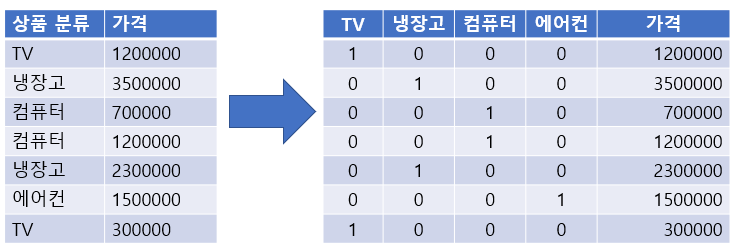

### One-Hot Encoding 변환 처리

- **Scikit-learn**
    - sklearn.preprocessing.OneHotEncoder 이용
        - fit(데이터셋): 데이터셋을 기준으로 어떻게 변환할 지 학습
        - transform(데이터셋): Argument로 받은 데이터셋을 원핫인코딩 처리
        - fit_transform(데이터셋): 학습과 변환을 한번에 처리
        - get_feature_names_out() : 원핫인코딩으로 변환된 Feature(컬럼)들의 이름을 반환
        - **데이터셋은 2차원 배열을 전달 하며 Feature별로 원핫인코딩 처리한다.**
            - DataFrame도 가능
            - 원핫인코딩 처리시 모든 타입의 값들을 다 변환한다. (연속형 값들도 변환) 그래서 변환려는 변수들만 모아서 처리해야 한다.

In [191]:
import numpy as np
items=np.array(['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서', "냉장고"])
items.shape

(9,)

In [192]:
np.unique(items)

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

In [193]:
# 2차원 배열로 바꾸는 작업
items = items[..., np.newaxis] # items.reshape(-1,1)
print(items.shape)

(9, 1)


In [194]:
items

array([['TV'],
       ['냉장고'],
       ['전자렌지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서'],
       ['냉장고']], dtype='<U4')

In [224]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
ohe = OneHotEncoder() # default : sparse_output = True , csr_matrix로 반환
# ohe = OneHotEncoder(sparse_output=False) # 결과를 ndarray로 반환


# 학습
ohe.fit(items)
# 변환
result = ohe.transform(items)

In [225]:
result.shape

(9, 6)

In [226]:
ohe.get_feature_names_out()

array(['x0_TV', 'x0_냉장고', 'x0_믹서', 'x0_선풍기', 'x0_전자렌지', 'x0_컴퓨터'],
      dtype=object)

In [227]:
type(result)

scipy.sparse._csr.csr_matrix

In [228]:
result.toarray() # csr_matrix -> ndarray

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [229]:
print(result)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 1)	1.0


In [230]:
pd.DataFrame(result.toarray(), columns=ohe.get_feature_names_out())

,x0_TV,x0_냉장고,x0_믹서,x0_선풍기,x0_전자렌지,x0_컴퓨터
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0


> OneHotEncoder객체 생성시 sparse 매개변수의 값을 False로 설정하지 않으면 scipy의 csr_matrix(희소행렬 객체)로 반환.     
> 희소행렬은 대부분 0으로 구성된 행렬과 계산이나 메모리 효율을 이용해 0이 아닌 값의 index만 관리한다.   
> csr_matrix.toarray()로 ndarray로 바꿀수 있다.

### TODO: adult dataset에 one-hot encoding 적용

- 전체 컬럼 중에서 **'age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'income'** 컬럼들만 추출해서 다음 작업을 한다.
    - 범주형
        - 'workclass','marital-status', 'occupation','relationship','race': **One Hot Encoding** 처리
        - 'income': **target값**으로  **Label Encoding** 처리
    - 연속형
        - 'age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week': **유지**
        
- 결과를 X_ohe, y 변수에 할당.        

In [321]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [322]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week',
        'native-country', 'income']

df = pd.read_csv('data/adult.data', 
                 header=None, 
                 names=cols, 
                 na_values="?",
                 skipinitialspace=True)
df.shape

(32561, 15)

In [323]:
# adult.data 읽어들이기
# 사용할 컬럼들 만 추출
adult_df = df[['age', 'workclass', 'fnlwgt', 'education-num',
               'marital-status', 'occupation', 'relationship', 'race', 'capital-gain', 
               'capital-loss', 'hours-per-week', 'income']].copy()
adult_df.shape

(32561, 12)

In [324]:
# one-hot encoding
category_columns = ['workclass','marital-status', 'occupation','relationship','race']

# no change
numeric_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

# label encoding
target = 'income'

## 원핫 인코딩, 레이블 인코딩 실습 예제

one-hot encoding은 인코딩할 feature들을 모아서 한번에 처리 가능<br><br>
`X_ohe = one-hot encoding + numeric columns`<br>
`y = Label encoding income`

In [335]:
# 시작 전에 결측치 처리부터 -> dropna()
adult_df = adult_df.dropna()
adult_df.isnull().sum(), adult_df.shape

(age               0
 workclass         0
 fnlwgt            0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 income            0
 dtype: int64,
 (30718, 12))

In [336]:
# income을 Label encoding 후 변수 y 할당
le = LabelEncoder()
y = le.fit_transform(adult_df['income'])

In [351]:
print(y.shape)
print(le.classes_)
print(y[:10])

(30718,)
['<=50K' '>50K']
[0 0 0 0 0 0 0 1 1 1]


In [340]:
adult_df[category_columns]

,workclass,marital-status,occupation,relationship,race
0,State-gov,Never-married,Adm-clerical,Not-in-family,White
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White
2,Private,Divorced,Handlers-cleaners,Not-in-family,White
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black
...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White
32558,Private,Widowed,Adm-clerical,Unmarried,White
32559,Private,Never-married,Adm-clerical,Own-child,White


In [343]:
# category_columns One-hot encoding 후 변수 X_ohe 할당

# 객체 생성
ohe = OneHotEncoder(sparse_output = False) # 결과 값 ndarray로 반환 하기 위한 파라미터

# 학습 및 변환
tmp_ohe = ohe.fit_transform(adult_df[category_columns])

In [345]:
tmp_ohe.shape # 컬럼이 5개에서 39개로 늘어남

# ndarray 형태

(30718, 39)

In [347]:
# 원핫인코딩 결과 + 수치형 컬럼 = X_ohe

adult_df[numeric_columns].shape
# dataframe 형태

(30718, 6)

In [349]:
# DataFrame.values -> DataFrame을 ndarray로 변환
adult_df[numeric_columns].values

array([[    39,  77516,     13,   2174,      0,     40],
       [    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]], dtype=int64)

In [352]:
# 원핫인코딩 결과 + 수치형 컬럼 합치기
X_ohe = np.concatenate([tmp_ohe, adult_df[numeric_columns].values], 
               axis=1 # 컬럼이 늘어나도록 축 설정
)
X_ohe.shape

(30718, 45)

In [359]:
ohe.get_feature_names_out()

array(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative

#### 여기까지가 데이터 전처리

#### 데이터셋 분리

In [364]:
# train/test/validation
X_tmp, X_test, y_tmp, y_test = train_test_split(X_ohe, y, test_size=0.2, 
                                                stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2, 
                                                 stratify=y_tmp, random_state=0)
X_train.shape, X_val.shape, X_test.shape

((19659, 45), (4915, 45), (6144, 45))

### 모델링

In [377]:
max_depth_list = [3, 4, 5, 6, 7, 8, 9]

# 각각의 정확도를 시각화 하기 위해 리스트로 담는다.
acc_train_list= []
acc_val_list =[]

for max_depth in max_depth_list:
    # 모델생성
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    
    # 학습
    tree.fit(X_train, y_train)
    
    # 검증
    ## 추정 -> train set, validation set
    pred_train = tree.predict(X_train)
    pred_val = tree.predict(X_val)
    
    ## 평가
    acc_train = accuracy_score(y_train, pred_train)
    acc_val = accuracy_score(y_val, pred_val)
    
    # 시각화를 위해 데이터 리스트 만들기
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
    
    # 평가 결과를 출력
    print(f"max_depth: {max_depth}")
    print("Train set 정확도:", acc_train)
    print("Val set 정확도:", acc_val)
    print("="*50)

max_depth: 3
Train set 정확도: 0.8409888600640928
Val set 정확도: 0.8364191251271618
max_depth: 4
Train set 정확도: 0.8410397273513404
Val set 정확도: 0.8360122075279756
max_depth: 5
Train set 정확도: 0.8487715550129712
Val set 정확도: 0.8437436419125127
max_depth: 6
Train set 정확도: 0.8541126201739662
Val set 정확도: 0.8459816887080366
max_depth: 7
Train set 정확도: 0.8561981789511165
Val set 정확도: 0.8400813835198372
max_depth: 8
Train set 정확도: 0.8598606236329417
Val set 정확도: 0.8431332655137335
max_depth: 9
Train set 정확도: 0.8648456177832036
Val set 정확도: 0.8406917599186164


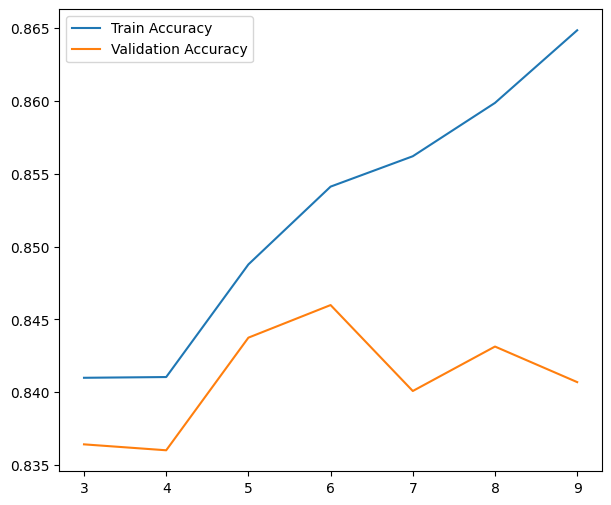

In [379]:
import matplotlib.pyplot as plt

# max_depth 값의 변화에 따른 정확도 변화를 시각화하기
# 라인플롯 그리기
plt.figure(figsize=(7,6))
plt.plot(max_depth_list, acc_train_list, label = "Train Accuracy")
plt.plot(max_depth_list, acc_val_list, label = "Validation Accuracy")
plt.legend()
plt.show()

### 만약 유사한 성능의 validation 값들이 여러 개라면, train과의 차이가 가장 적은 하이퍼 파라미터 값을 채택한다.

#### 최종 평가

In [380]:
best_model = DecisionTreeClassifier(random_state=0, max_depth=6)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [381]:
pred_test = best_model.predict(X_test)
accuracy_score(y_test, pred_test)

0.8497721354166666

# 수치형 데이터 전처리

## Feature Scaling(정규화)
- 데이터의 속성인 각 feature들간의 값의 척도(Scale)를 같은 기준으로 통일한다.
    > 척도: 값을 측정하거나 평가하는 단위. ex) cm, km, kg
- 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 feature간의 서로 다른 척도(Scale)에 영향을 받는다.
    - 선형모델, SVM 모델, 신경망 모델
- **Scaling(정규화)은 train set으로 학습(fitting) 한다. test set, validation set 그리고 모델이 예측할 새로운 데이터는 train set으로 학습한 scaler를 사용해 변환만 한다.**
    - test set과 validation set은 모델이 앞으로 예측할 새로운 데이터에 대해 어느 정도 성능을 가지는지를 평가하는 용으로 쓰인다. 그런데 새로운 데이터들이 모델링할 때 사용할 데이터셋(sample)의 scale과 같다라고 보장할 수 없으므로 **전체 sample 데이터셋을 학습 시킨 뒤 train/validation/test 으로 나누는 것은 모델의 정확한 성능평가를 할 수 없다.**

> 🚩🚩연속형 데이터는 **모델에 따라서** Feature Scaling 할 지, 말 지가 결정된다.

- 범주형 데이터의 경우, 모델에 따라서 Label encoding을 할지, One-hot encoding을 할지가 결정된다.<br>
(어찌됐든, encoding 과정은 무조건 거친다.)<br>
그러나 연속형 데이터의 경우, Feature Scaling을 안하는 경우도 있다는 것.
<!-- 
범주형 데이터 전처리는 Train, Validation, Test 데이터셋을 나누기이전에 전처리가 진행되나
Fea -->

### 종류
- **표준화(Standardization) Scaling**
    - StandardScaler 사용
- **Min Max Scaling**
    - MinMaxScaler 사용

### 메소드
#### 사용되는 데이터는 2차원 형태여야한다. 2차원 배열, DataFrame,...
- fit(): 어떻게 변환할 지 학습
    - 2차원 배열을 받으면 0축을 기준으로 학습한다. (DataFrame으로는 컬럼기준)
- transform(): 변환
    - 2차원 배열을 받으며 0축을 기준으로 변환한다. (DataFrame으로는 컬럼기준)
- fit_transform(): 학습과 변환을 한번에 처리 
- inverse_transform(): 변환된 값을 원래값으로 복원

###  표준화(StandardScaler)
- 피쳐의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환한다.
    - 0을 기준으로 모든 데이터들이 모여있게 된다

$$
New\,x_i = \cfrac{X_i-\mu}{\sigma}\\
\mu-평균,\;  \sigma-표준편차
$$

- **sklearn.preprocessing.StandardScaler** 를 이용

In [3]:
import numpy as np

data = np.array([10, 2, 30]).reshape([3,1]) # 2차원 배열로 변경

print(data.shape)
m = data.mean()
sd = data.std()
print(f"평균: {m}, 표준편차: {sd}")

(3, 1)
평균: 14.0, 표준편차: 11.775681155103795


In [6]:
tmp = data - m # 브로드캐스팅 잊지말자...
r = tmp / sd
print(r.mean(), r.std())
r

0.0 1.0


array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data) # data는 2차원 배열 형태여야만 한다. 컬럼별로 평균, 표준편차 계산

r2 = scaler.transform(data) # fit()에서 찾은 평균-표준편차를 이용해 원소들을 반환
r2

array([[-0.33968311],
       [-1.01904933],
       [ 1.35873244]])

In [35]:
# iris dataset 
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.mean() # 자동으로 컬럼별, Feature 별로 계산

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [12]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [33]:
df.agg(['mean', 'std']).T

# pd.DataFrame.agg().T
# agg() -> aggregation , 집계함수

,mean,std
sepal length (cm),5.843333,0.828066
sepal width (cm),3.057333,0.435866
petal length (cm),3.758000,1.765298
petal width (cm),1.199333,0.762238


In [16]:
# Scaling by StandardScaler()
scaler = StandardScaler()
scaler.fit(iris['data'])
iris_scaled = scaler.transform(iris['data'])

In [20]:
iris_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [27]:
iris_scaled.shape

(150, 4)

In [28]:
iris_scaled.mean(axis=0) 

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [29]:
iris_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [30]:
iris_scaled[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [31]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

## Feature scaling 
- scaler는 train set으로 학습(fit) 시킨다.
- train, validation, test set은 **train set으로 학습한 scaler로 변환한다.** ==> validation, test set은 학습시키지 않는다.
    - 이유: 앞으로 모델이 예측할 새로운 데이터셋에 대한 정확한 평가를 위해서.

In [37]:
# 분리
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(iris['data'], iris['target'], 
                                                test_size=0.2, stratify=iris['target'],
                                                random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2,
                                                  stratify=y_tmp, random_state=0)

In [40]:
# X_train으로 scaler 학습(fit())
scaler = StandardScaler()
scaler.fit(X_train)
# X_train_scaled = scaler.fit_transform(X_train), X_train에 한해서만 fit_transform()

StandardScaler()

In [41]:
# X_train을 Fit한 scaler를 이용해서 X_train, X_val, X_test 변환
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [45]:
# 변환된 dataset 별로 평균, 표준편차 확인
## X_train
print(X_train_scaled.mean(), X_train_scaled.std())

2.6830389761774615e-16 0.9999999999999998


In [46]:
## X_val
print(X_val_scaled.mean(), X_val_scaled.std())

-0.10386741503088819 1.0571753140306965


In [47]:
## X_test
print(X_test_scaled.mean(), X_test_scaled.std())

-0.031708659543466244 0.9171878015445646


### MinMaxScaler
- 데이터셋의 모든 값을 0(Min value)과 1(Max value) 사이의 값으로 변환한다.
$$
New\,x_i = \cfrac{x_i - min(X)}{max(X) - min(X)}
$$

In [48]:
data

array([[10],
       [ 2],
       [30]])

In [49]:
min_v, max_v = data.min(), data.max()
min_v, max_v

(2, 30)

In [50]:
(30 - min_v )/(max_v-min_v)

1.0

In [51]:
(data - min_v )/(max_v-min_v)

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [54]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(data) # 2차원 배열 형태의 data, fit() : feature 별로 min/max 값 찾기
mm_scaler.transform(data)

array([[0.28571429],
       [0.        ],
       [1.        ]])

In [55]:
X_train

array([[4.4, 2.9, 1.4, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [7.4, 2.8, 6.1, 1.9],
       [6.5, 3. , 5.5, 1.8],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 2.2, 4. , 1. ],
       [6.3, 2.5, 5. , 1.9],
       [5. , 3.5, 1.6, 0.6],
       [6.8, 3. , 5.5, 2.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [6.5, 3.2, 5.1, 2. ],
       [6.9, 3.2, 5.7, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [5.4, 3.4, 1.7, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [6. , 3.4, 4.5, 1.6],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 3.3, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [6.2, 3.4, 5.4, 2.3],
       [6.3, 2.3, 4.4, 1.3],
       [5.1, 3.5, 1.4, 0.3],
       [6.4, 2.9, 4.3, 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.4, 3

In [53]:
# iris dataset
# train set의 min, max
print("Min value - train, val, test")
print(X_train.min(axis=0), X_val.min(axis=0), X_test.min(axis=0))

print("Max value - train, val, test")
print(X_train.max(axis=0), X_val.max(axis=0), X_test.max(axis=0))

Min value - train, val, test
[4.3 2.2 1.  0.1] [4.7 2.  1.4 0.1] [4.6 2.4 1.3 0.1]
Max value - train, val, test
[7.9 4.4 6.7 2.5] [7.7 4.2 6.9 2.3] [7.2 3.8 6.  2.5]


In [56]:
# MinMaxScaling
mm_scaler = MinMaxScaler()
X_train_scaled_mm = mm_scaler.fit_transform(X_train) 
X_val_scaled_mm = mm_scaler.transform(X_val)
X_test_scaled_mm = mm_scaler.transform(X_test)

In [57]:
print("Max value - train, val, test")
print(X_train_scaled_mm.max(axis=0), X_val_scaled_mm.max(axis=0), X_test_scaled_mm.max(axis=0))
print("Min value - train, val, test")
print(X_train_scaled_mm.min(axis=0), X_val_scaled_mm.min(axis=0), X_test_scaled_mm.min(axis=0))

Max value - train, val, test
[1. 1. 1. 1.] [0.94444444 0.90909091 1.03508772 0.91666667] [0.80555556 0.72727273 0.87719298 1.        ]
Min value - train, val, test
[0. 0. 0. 0.] [ 0.11111111 -0.09090909  0.07017544  0.        ] [0.08333333 0.09090909 0.05263158 0.        ]


### 위스콘신 유방암 데이터셋
- 위스콘신 대학교에서 제공한 유방암 진단결과 데이터
- Feature: 종양 측정값들
    - 모든 Feature들은 연속형(continous)이다.
- target: 악성, 양성 여부
- scikit-learn에서 toy dataset으로 제공한다. 
    - load_breast_cancer() 함수 이용

In [58]:
import numpy as np

In [59]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data['data']
y = data['target']
X.shape, y.shape

((569, 30), (569,))

In [60]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [61]:
#0: 악성, 1:양성
data['target_names'] 

array(['malignant', 'benign'], dtype='<U9')

In [62]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

- train / validation / test 분리
    - tmp / test - 0.8 : 0.2
    - tmp -> train/val - 0.8 : 0.2

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pandas as pd


In [64]:
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, 
                                                  test_size=0.2, 
                                                  stratify=y_tmp, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [66]:
X_train_df = pd.DataFrame(X_train, columns=data['feature_names'])
X_val_df = pd.DataFrame(X_val, columns=data['feature_names'])
X_test_df = pd.DataFrame(X_test, columns=data['feature_names'])

In [68]:
X_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
1,13.78,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,...,15.27,17.50,97.90,706.6,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810
2,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.197400,0.100900,0.1907,0.06049,...,22.82,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
3,13.90,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698
4,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,11.93,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.012160,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.13410,0.11530,0.02639,0.04464,0.2615,0.08269
360,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766
361,13.53,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,...,14.08,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191
362,10.82,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626


In [69]:
X_val_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
1,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994
2,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
3,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
4,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.01,19.52,134.90,1227.0,0.12550,0.28120,0.24890,0.14560,0.2756,0.07919
87,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,11.94,19.35,80.78,433.1,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800
88,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.15310,0.11200,0.09823,0.06548,0.2851,0.08763
89,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014


In [70]:
X_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.3966,0.33810,0.15210,0.3651,0.11830
1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.29100,0.4055,0.09789
2,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
3,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061
4,12.830,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.62820,0.19770,0.3407,0.12430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.54090,0.18130,0.4863,0.08633
110,18.220,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.38530,0.17760,0.2812,0.08198
111,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.82160,0.15710,0.3108,0.12590
112,12.870,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,14.45,24.38,95.14,626.9,0.1214,0.1652,0.07127,0.06384,0.3313,0.07735


### TODO
- StandardScaler와 MinMax Scaler를 이용해 위스콘신 유방암 데이터셋의 Feature들 scaling 처리를 한다.
    - Scaler 학습은 Train set으로 만 하고 그 학습된 것을 이용해 Train/Validation/Test set을 변환한다.
- **StandardScaler 로 변환한 결과를 저장할 변수**
    - X_train_scaled1, X_val_scaled1, X_test_scaled1
- **MinMaxScaler 로 변환한 결과를 저장할 변수**
    - X_train_scaled2, X_val_scaled2, X_test_scaled2

Scaling : 학습-train set, 변환-train, val, test

##### 표준화(StandardScaling)

In [81]:
# 변환전 평균, 표준편차
X_train_df.agg(["mean", "std"]).T

,mean,std
mean radius,14.173478,3.622847
mean texture,19.174231,4.240037
mean perimeter,92.287170,24.999251
mean area,661.099451,365.089909
mean smoothness,0.096343,0.014091
mean compactness,0.104168,0.053197
mean concavity,0.088620,0.078731
mean concave points,0.049121,0.039568
mean symmetry,0.180290,0.027193
mean fractal dimension,0.062672,0.006991


In [72]:
X_val_df.agg(['mean', 'std']).T

,mean,std
mean radius,14.009571,3.528089
mean texture,19.447033,4.819788
mean perimeter,91.098022,24.171235
mean area,643.897802,356.786712
mean smoothness,0.097035,0.013129
mean compactness,0.103921,0.047704
mean concavity,0.085136,0.069899
mean concave points,0.049030,0.036430
mean symmetry,0.184201,0.026630
mean fractal dimension,0.062910,0.006986


In [73]:
X_test_df.agg(['mean', 'std']).T

,mean,std
mean radius,14.073789,3.213541
mean texture,19.532544,4.075435
mean perimeter,91.648509,22.223488
mean area,643.833333,304.290282
mean smoothness,0.095877,0.014783
mean compactness,0.105227,0.055819
mean concavity,0.092296,0.090100
mean concave points,0.048186,0.038487
mean symmetry,0.181520,0.028763
mean fractal dimension,0.063111,0.007385


In [82]:
# scaling
s_scaler = StandardScaler()
# train set으로 학습 및 변환
X_train_scaled1 = s_scaler.fit_transform(X_train)
# val, test set은 변환만.
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

##### 확인
- 평균, 표준편차 확인

In [86]:
# 변환후 확인
pd.DataFrame(X_train_scaled1, columns=data['feature_names']).agg(['mean', 'std']).T

,mean,std
mean radius,-2.537653e-15,1.001376
mean texture,-1.307867e-15,1.001376
mean perimeter,-6.441734e-16,1.001376
mean area,2.440051e-16,1.001376
mean smoothness,-8.515777e-16,1.001376
mean compactness,5.294910e-16,1.001376
mean concavity,4.245688e-16,1.001376
mean concave points,-4.977703e-16,1.001376
mean symmetry,-1.647034e-15,1.001376
mean fractal dimension,2.703576e-15,1.001376


In [87]:
pd.DataFrame(X_val_scaled1, columns=data['feature_names']).agg(['mean', 'std']).T

,mean,std
mean radius,-0.045305,0.975185
mean texture,0.064428,1.138297
mean perimeter,-0.047633,0.968209
mean area,-0.047181,0.978602
mean smoothness,0.049170,0.933004
mean compactness,-0.004655,0.897990
mean concavity,-0.044309,0.889047
mean concave points,-0.002286,0.921953
mean symmetry,0.144029,0.980635
mean fractal dimension,0.034098,1.000597


In [88]:
pd.DataFrame(X_test_scaled1, columns=data['feature_names']).agg(['mean', 'std']).T

,mean,std
mean radius,-0.027555,0.888242
mean texture,0.084623,0.962502
mean perimeter,-0.025582,0.890190
mean area,-0.047358,0.834614
mean smoothness,-0.033099,1.050593
mean compactness,0.019931,1.050728
mean concavity,0.046750,1.145982
mean concave points,-0.023651,0.974020
mean symmetry,0.045306,1.059172
mean fractal dimension,0.062934,1.057814


##### MinMax Scaling

In [89]:
# 변환전 min, max 확인
X_train_df.agg(['min', 'max']).T

,min,max
mean radius,7.691000,27.42000
mean texture,9.710000,33.81000
mean perimeter,47.920000,186.90000
mean area,170.400000,2501.00000
mean smoothness,0.052630,0.14250
mean compactness,0.019380,0.34540
mean concavity,0.000000,0.37540
mean concave points,0.000000,0.19130
mean symmetry,0.106000,0.30400
mean fractal dimension,0.049960,0.09744


In [90]:
X_val_df.agg(['min', 'max']).T

,min,max
mean radius,8.571000,28.11000
mean texture,11.280000,39.28000
mean perimeter,54.530000,188.50000
mean area,221.300000,2499.00000
mean smoothness,0.068830,0.13350
mean compactness,0.038130,0.27700
mean concavity,0.000000,0.35140
mean concave points,0.000000,0.15950
mean symmetry,0.134200,0.27430
mean fractal dimension,0.050540,0.09575


In [91]:
X_test_df.agg(['min', 'max']).T

,min,max
mean radius,6.981000,24.25000
mean texture,12.170000,32.47000
mean perimeter,43.790000,166.20000
mean area,143.500000,1761.00000
mean smoothness,0.066130,0.16340
mean compactness,0.026500,0.28670
mean concavity,0.000000,0.42680
mean concave points,0.000000,0.20120
mean symmetry,0.116700,0.26780
mean fractal dimension,0.050250,0.09502


In [92]:
## 변환
m_scaler = MinMaxScaler()
### X_train으로 학습. X_train, X_val, X_test 변환

# train set 학습 + 변환
X_train_scaled2 = m_scaler.fit_transform(X_train)
# val, teset 변환만
X_val_scaled2 = m_scaler.transform(X_val)
X_test_scaled2 = m_scaler.transform(X_test)

##### 확인
- min, max값 확인

In [93]:
pd.DataFrame(X_train_scaled2).agg(['min', 'max']).T

,min,max
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [94]:
pd.DataFrame(X_val_scaled2).agg(['min', 'max']).T

,min,max
0,0.044604,1.034974
1,0.065145,1.226971
2,0.047561,1.011512
3,0.021840,0.999142
4,0.180260,0.899855
5,0.057512,0.790197
6,0.000000,0.936068
7,0.000000,0.833769
8,0.142424,0.850000
9,0.012216,0.964406


In [95]:
pd.DataFrame(X_test_scaled2).agg(['min', 'max']).T

,min,max
0,-0.035988,0.839323
1,0.102075,0.944398
2,-0.029717,0.851058
3,-0.011542,0.682485
4,0.150217,1.232558
5,0.021839,0.819950
6,0.000000,1.136921
7,0.000000,1.051751
8,0.054040,0.817172
9,0.006108,0.949031


### Modeling

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### scaling하지 않은 데이터셋 이용

In [102]:
# 모델 생성
svm = SVC(random_state=0, C=0.1, gamma=0.1)
# 학습
svm.fit(X_train, y_train)
# 검증
## 추론
pred_train = svm.predict(X_train)
pred_val = svm.predict(X_val)
## 평가 - 정확도
print("train:", accuracy_score(y_train, pred_train))
print("validation:", accuracy_score(y_val, pred_val))

train: 0.6263736263736264
validation: 0.6263736263736264


##### standardscaler 데이터셋 이용¶

In [103]:
# 모델 생성
svm = SVC(random_state=0, C=0.1, gamma=0.1)

# 학습
svm.fit(X_train_scaled1, y_train)

# 검증
## 추론 => 학습할 때 사용한 데이터에 전처리한 것을 똑같이 적용해서 추론한다.
### StandardScaling한 X_train으로 학습했다면, 
### 추론 과정에서도 StandardScaling한 X_train으로 학습, 변환한 데이터셋, val도 사용한다.
pred_train1 = svm.predict(X_train_scaled1)
pred_val1 = svm.predict(X_val_scaled1)

## 평가 - 정확도
print("train:", accuracy_score(y_train, pred_train1))
print("validation:", accuracy_score(y_val, pred_val1))

train: 0.9560439560439561
validation: 0.9340659340659341


##### MinMax Scaling 데이터셋 이용

In [106]:
# 모델 생성
svm = SVC(random_state=0, C=0.1, gamma=0.1)

# 학습
svm.fit(X_train_scaled2, y_train)

# 검증
## 추론
pred_train2 = svm.predict(X_train_scaled2)
pred_val2 = svm.predict(X_val_scaled2)

## 평가 - 정확도
print("train:", accuracy_score(y_train, pred_train2))
print("validation:", accuracy_score(y_val, pred_val2))

train: 0.9175824175824175
validation: 0.9010989010989011


# TODO adult dataset 모델링

- 전처리
    - 범주형: one hot encoding
    - 연속형: standard scaling
- 모델
    - sklearn.linear_model.**LogisticRegression(max_iter=1000, random_state=0)**
    - sklearn.svm.**SVC(random_state=0)**
- train/test dataset으로 나누고 train set으로 cross validation 학습 및 검증을 하고 test set으로 최종 평가 진행

1. import
2. data loading
3. 결측치 처리
4. input, output data 분리
5. 범주형 feature 전처리
6. train test set 분리
7. 연속형 feature 전처리
8. 모델링

In [4]:
cols = ['age', 'workclass','fnlwgt','education', 'education-num', 'marital-status', 'occupation','relationship', 'race', 'gender','capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

# 원핫인코딩
category_columns = ['workclass','education','marital-status', 'occupation','relationship','race','gender','native-country']

# Feature Scaling
continuous_columns = ['age','fnlwgt', 'education-num','capital-gain','capital-loss','hours-per-week']

# 레이블 인코딩
target = 'income'

In [7]:
class_name = np.array(["5만달러 이하", "5만달러 초과"])

In [6]:
# import 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## 내가 한거

In [55]:
data = pd.read_csv('data/adult.data', 
                   header=None,
                   names=cols,
                   skipinitialspace=True,
                   na_values="?"
)
data.shape

(32561, 15)

In [28]:
adult_df = data.copy()
adult_df = adult_df.dropna()
adult_df.isnull().sum(), adult_df.shape

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 gender            0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
 dtype: int64,
 (30162, 15))

In [29]:
# Input(X), Output(y) 데이터 분리 
X = adult_df.drop(columns='income')
y = adult_df['income']
X.shape, y.shape

((30162, 14), (30162,))

In [33]:
# income : Label encoding
le = LabelEncoder()
y_income = le.fit_transform(y)
print(y_income.shape)
print(le.classes_)
print(y_income[:10])

(30162,)
['<=50K' '>50K']
[0 0 0 0 0 0 0 1 1 1]


In [31]:
X[category_columns].shape

(30162, 8)

In [37]:
# 범주형 데이터 전처리 category_columns : One-Hot Encoding

ohe = OneHotEncoder(sparse_output=False) 
# sparse_output=False : 결과 값 ndarray로 반환 하기 위한 파라미터

X_category = ohe.fit_transform(X[category_columns])
X_category.shape

(30162, 98)

In [38]:
X_con

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [41]:
# 연속형 데이터 전처리 전 train / test data set 분리 : train_test_split()
X_con = X[continuous_columns] 
X_tmp_con, X_test_con, y_tmp_con, y_test_con = train_test_split(X_con, y_income, 
                                                                    test_size=0.2, stratify=y_income,
                                                                    random_state=0
                                                                   )
X_train_con, X_val_con, y_train_con, y_val_con = train_test_split(X_tmp_con, y_tmp_con, 
                                                                    test_size=0.2, stratify=y_tmp_con,
                                                                    random_state=0
                                                                   )
X_train_con.shape , X_val_con.shape, X_test_con.shape

((19303, 6), (4826, 6), (6033, 6))

In [48]:
# 연속형 데이터 전처리 continuous_columns : Standart Scaling
s_scale = StandardScaler()
X_con_scaled = s_scale.fit_transform(X_con)
X_train_con = s_scale.fit_transform(X_train_con)
X_val_con = s_scale.transform(X_val_con)
X_test_con = s_scale.transform(X_test_con)

In [49]:
X_con_scaled.shape

(30162, 6)

In [51]:
# 전처리한 범주형 데이터셋과 연속형 데이터셋 합치기
X_final = np.concatenate([X_category, X_con_scaled], 
               axis=1 # 컬럼이 늘어나도록 축 설정
)
X_final.shape

(30162, 104)

In [52]:
result_adult1 = cross_val_score(LogisticRegression(max_iter=1000, random_state=0),
                               X=X_final,
                               y=y_income,
                               scoring = "neg_mean_squared_error",
                               cv=4,
                               n_jobs=-1)
print(result_adult1)

[-0.15435619 -0.15594749 -0.14708223 -0.15079576]


In [54]:
result_adult2 = cross_val_score(SVC(random_state=0),
                               X=X_final,
                               y=y_income,
                               scoring = "accuracy",
                               cv=4,
                               n_jobs=-1)
print(result_adult2)

[0.84763294 0.85068293 0.85809019 0.85291777]


## 강사님 과정

In [8]:
df = pd.read_csv('data/adult.data', 
                   header=None,
                   names=cols,
                   skipinitialspace=True,
                   na_values="?"
)
df.shape

(32561, 15)

In [9]:
df.dropna(inplace=True)
df.shape

(30162, 15)

In [10]:
# 행삭제 후 index name을 다시 설정 (0부터 1씩 증가)
df.reset_index(drop=True, inplace = True) ## index 컬럼을 만들지 말고 빼서 행 인덱스로 냅두기
# 원래 index를 제거하고 자동증가 정수 index로 변경
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# X,y를 분리
## y : 레이블 인코딩
y = LabelEncoder().fit_transform(df[target])
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [12]:
# X 중 범주형 타입 feature에 대해 One-Hot Encoding 처리
ohe = OneHotEncoder(sparse_output=False) # handle_unknown="ignore" : 모르는 데이터에 대해 0으로 자동 처리
                                        # default는 "error" : 모르는 데이터에 대해 에러 발생
ohe_tmp = ohe.fit_transform(df[category_columns])
ohe_tmp.shape

(30162, 98)

In [13]:
# 원핫인코딩 결과 + 연속형 컬럼값 = Dataset
X = np.concatenate([ohe_tmp,df[continuous_columns].values], axis=1)
X.shape

(30162, 104)

In [14]:
X[:5]

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

### 범주형 - One Hot Encoding + 연속형 (그대로) ==> DataSet 1차 완성

1. 여기서 Train / Test set 분할 후 
1. 연속형 데이터 전처리 (Standard Scaling)
1. 최종 모델링

In [15]:
# train, test set 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=y,
                                                   random_state=0)
X_train.shape, X_test.shape

((22621, 104), (7541, 104))

In [16]:
### Standard Scaling
####### Train set 학습, Train/Test 변환
s_scale = StandardScaler()
X_train_scaled = s_scale.fit_transform(X_train)
X_test_scaled = s_scale.transform(X_test)

In [17]:
X_train_scaled.mean(axis=0)

array([-2.10974767e-16,  1.37630158e-15, -2.60503151e-16,  5.60458703e-16,
       -1.16486793e-15,  1.45250457e-15,  7.20291297e-16, -2.16814959e-15,
        1.95432577e-15,  5.10553636e-16, -3.12641326e-16, -1.10931015e-15,
        9.44263799e-16, -7.00928590e-16,  1.92233833e-15,  3.47633646e-16,
       -8.71079189e-16, -8.04222129e-16,  8.61027747e-16, -1.33615226e-15,
       -5.52688835e-16,  1.37858132e-15,  2.23772197e-16,  7.87359705e-16,
       -9.44807352e-17, -3.80326355e-15,  6.47131534e-16,  6.82948386e-16,
        3.47366164e-16,  1.81112708e-15,  8.87000516e-16,  8.84519251e-16,
        2.52949354e-15, -1.51404757e-16,  1.58280768e-16, -2.41805161e-15,
       -4.96177079e-16,  1.76018030e-15,  7.07528530e-16,  2.14792401e-15,
        1.33975713e-15, -6.29574638e-16, -1.05375973e-15,  9.70104054e-16,
        3.47569843e-16, -1.89551158e-15,  2.77469622e-15, -8.13626951e-16,
        2.37215510e-15,  2.34721790e-16, -1.50531145e-15,  3.21574987e-16,
        2.38034643e-18,  

In [18]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [19]:
X_test_scaled.mean(axis=0)

array([ 4.31461098e-03,  4.35808445e-03, -2.25592117e-02, -1.27952041e-02,
        3.19485118e-02,  6.36589344e-03,  2.35075192e-02, -4.34998890e-03,
        2.25093724e-02,  2.24182713e-02, -1.16652055e-02, -8.68028934e-06,
       -2.47405612e-02, -1.53681850e-02,  1.38811319e-02,  3.67956722e-03,
       -1.13820599e-02,  1.83068368e-02, -2.52709364e-02,  1.35712064e-02,
        3.45627687e-02, -7.28433080e-03,  1.93928557e-02, -1.81980867e-03,
       -1.41111240e-02, -5.84164601e-03,  7.27697197e-03,  1.11100559e-02,
       -7.86417252e-03, -4.06324720e-03,  4.13863282e-03, -1.99504073e-02,
        2.82570235e-03,  2.25394846e-02, -6.19646460e-03,  1.15988185e-02,
        1.33059947e-02, -3.05206343e-05, -1.92989823e-03, -1.32285817e-02,
       -1.45159205e-02, -1.68877374e-02, -2.33869653e-02,  1.03750350e-02,
       -2.49771708e-03,  9.47982211e-03, -7.55498430e-03, -3.27014966e-03,
        8.01487182e-03, -1.37565587e-02,  4.57896839e-03,  2.33286913e-03,
       -3.82103006e-03, -

In [20]:
X_test_scaled.std(axis=0)

array([1.01158302e+00, 1.00742411e+00, 1.01210582e+00, 9.67625743e-01,
       1.04755056e+00, 1.01439452e+00, 1.49960206e+00, 9.87307675e-01,
       1.05629797e+00, 1.09608054e+00, 9.16306457e-01, 9.99956222e-01,
       9.09167811e-01, 9.37794905e-01, 1.03567738e+00, 1.00823271e+00,
       9.89791689e-01, 1.07898855e+00, 9.90450466e-01, 1.02657811e+00,
       1.41330599e+00, 9.73374202e-01, 1.01287830e+00, 9.98107080e-01,
       7.07216294e-01, 9.99596981e-01, 1.03197994e+00, 1.00418484e+00,
       9.78637810e-01, 9.88201956e-01, 1.00473002e+00, 5.20417043e-16,
       1.00303861e+00, 1.02418431e+00, 9.83666395e-01, 1.02534540e+00,
       1.02326159e+00, 9.99961064e-01, 9.86035606e-01, 9.85680945e-01,
       9.51268068e-01, 9.79932388e-01, 9.34585234e-01, 1.02077337e+00,
       9.99558113e-01, 1.00526651e+00, 9.78854217e-01, 9.96754306e-01,
       1.01018282e+00, 9.70139123e-01, 1.02304003e+00, 1.00645448e+00,
       9.94649909e-01, 9.10934281e-01, 9.95075966e-01, 9.95619792e-01,
      

In [21]:
# 모델링 - Cross Validation
lr = LogisticRegression(max_iter=1000,random_state=0)
result_lr=cross_val_score(lr,
                         X_train_scaled, # feature(X, input data)
                         y_train, # target(y, output data, label)
                         scoring = "accuracy", # 평가지표
                         cv=5, # fold 개수
                         n_jobs=-1 # 병렬 처리시 사용할 cpu 프로세서 개수, -1: 전부다 사용
)

In [22]:
print(result_lr.mean())

0.8490779977626997


In [23]:
# 모델링 - SVC
svm = SVC(random_state=0)
result_svm=cross_val_score(svm,
                         X_train_scaled, # feature(X, input data)
                         y_train, # target(y, output data, label)
                         scoring = "accuracy", # 평가지표
                         cv=5, # fold 개수
                         n_jobs=-1 # 병렬 처리시 사용할 cpu 프로세서 개수, -1: 전부다 사용
)

In [24]:
print(result_svm.mean())

0.8448341320202628


In [25]:
## LogisticRegression 성능이 더 좋음 => 재학습
best_model = LogisticRegression(max_iter=1000, random_state=0)
best_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [26]:
## 최종 평가

pred_test = best_model.predict(X_test_scaled)
accuracy_score(y_test, pred_test)

0.8456438138177961

In [47]:
class_name[pred_test]

array(['5만달러 초과', '5만달러 이하', '5만달러 이하', ..., '5만달러 이하', '5만달러 초과',
       '5만달러 이하'], dtype='<U7')

# 모델 저장 

- **pickle 모듈이용**
    - 전처리 객체, 모델 객체를 모두 저장후 서비스 할때 load해 사용한다.

> # pickle 모듈을 이용한 객체 직렬화
> 
> ## 객체 직렬화(Object Serialization)란
> - 객체의 속성값들을 bytes로 변환해 출력하는 것을 객체 직렬화(Object Serialization) 이라고 한다.
> - bytes로 출력된 데이터를 읽어 객체화 하는 것을 객체 역직렬화(Object Deserialization) 이라고 한다.
> 
> ## pickle 모듈사용
> - 객체 파일 입출력을 위한 파이썬 모듈
> - open() 시 **binary mode**로 설정한다.
> - 저장시 파일 확장자는 보통 `pkl` 이나 `pickle` 로 한다.
> - ex)
> ```python
> fw = open("data.pkl", "wb") # 객체를 pickle에 저장하기 위한 output stream 생성
> fr = open("data.pkl", "rb") # 파일에 저장된 객체를 읽어오기 위한 input stream 생성
> ```
> - **메소드**
>     - dump(저장할 객체, fw) : 출력
>     - load(fr): 입력 - 읽은 객체를 반환한다.

In [1]:
import os

save_root = 'adult_data_model'

ohe_path = os.path.join(save_root, 'ohe.pkl')
scaler_path = os.path.join(save_root, 'scaler.pkl')
model_path = os.path.join(save_root, 'model.pkl')

os.makedirs(save_root, exist_ok=True) # save_root 디렉토리를 생성


In [2]:
print(ohe_path, scaler_path, model_path, sep=", ")

adult_data_model\ohe.pkl, adult_data_model\scaler.pkl, adult_data_model\model.pkl


In [27]:
import pickle

In [29]:
###### 저장
# OheHotEcoder저장
with open(ohe_path, "wb") as fw1:
    pickle.dump(ohe, fw1) # (저장할 객체-값, 출력stream-wb)

# StandardScaler 저장
with open(scaler_path, "wb") as fw2:
    pickle.dump(s_scale, fw2)
    
# 모델 저장
with open(model_path, "wb") as fw3:
    pickle.dump(best_model, fw3)

In [31]:
###### 로딩
import pickle
# 모델 로딩
with open(model_path, 'rb') as fr1:
    save_model = pickle.load(fr1) # 읽어드릴 피클파일과 연결된 input stream
    
# OheHotEcoder loading
with open(ohe_path, 'rb') as fr2:
    save_ohe = pickle.load(fr2)
    
# scaler loading
with open(scaler_path, 'rb') as fr3:
    save_scaler = pickle.load(fr3)

In [32]:
from sklearn.metrics import accuracy_score
pred_test10 = save_model.predict(X_test_scaled)
accuracy_score(y_test, pred_test10)

0.8456438138177961

In [36]:
# 새로운 데이터 추론
new_data = df.iloc[:5]
new_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
# 전처리
### OneHotEncoding -> Standard Scaling

In [39]:
tmp = save_ohe.transform(new_data[category_columns])
tmp.shape

(5, 98)

In [41]:
# ohe + 연속형
tmp2 = np.concatenate([tmp,new_data[continuous_columns].values], axis=1)
tmp2.shape

(5, 104)

In [42]:
# Scaling

In [43]:
new_X = save_scaler.transform(tmp2)
new_X.shape

(5, 104)

In [44]:
new_pred = save_model.predict(new_X)
new_pred

array([0, 0, 0, 0, 1])

In [45]:
class_name[new_pred]

array(['5만달러 이하', '5만달러 이하', '5만달러 이하', '5만달러 이하', '5만달러 초과'], dtype='<U7')